`CMPE-255. Fall 2023`

# Breaking Enigma
The Enigma machine was used by the Germans in WWII to encrypt messages. It used a polyalphabetic substitution cipher to create encrypted text from plain text.
Our team of double-0 agents has retrieved one encrypted messages. Our job is to break the code! Or at least, examine the data and generate some statistics on it...



##Additional details
For this assignment, a simplified Enigma cipher is used. It uses a simple substitution scheme where each letter is replaced by a different letter at a specific, fixed, distance.

The space character (' ') is encoded as character '@'.

In [ ]:
# Libraries - NO OTHER LIBRARY IS ALLOWED FOR THIS HOMEWORK
import random
import numpy as np
import sys
import matplotlib.pyplot as plt
# DO NOT ADD MORE LIBRARIES

In [ ]:
# Plain text message
MESSAGE = "Sunny with early morning fog high 34C low 15C."
MESSAGE += "Admiral Crook arriving to Calais at 1400."
MESSAGE += "Prepare a light lunch and a bottle of Chateau Mouton Rothschild 1945."
MESSAGE += "God save the King."
# Alphabet
# Use '@' for ' '
ALPHABET = "@.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

In [ ]:
def transpose_character(character, key):
    ''' Return a character that is at a distance 'key'
        from the supplied character'''
    transposed = ''
    # Replace space with '@'
    if character == ' ':
        character = '@'
    # Find character in the alphabet
    c_idx = ALPHABET.find(character)
    # Identify the character that is at distance 'key'
    c_key = key + c_idx
    if (c_key >= len(ALPHABET)):
        c_key = c_key - len(ALPHABET)

    return ALPHABET[c_key]

In [ ]:
def encrypt_message(message, key):
    '''Given a plain text message and a key, generate an encrypted message'''
    ciphertext = ""
    for character in message.upper():
        ciphertext += transpose_character(character, key)
    return ciphertext

In [ ]:
def decrypt_message(message, key):
    ''' Given an encrypted text message and a key, generate a plain text message'''
    tmp = ""
    for character in message.upper():
        tmp += transpose_character(character, key)

    # Handle 'space'
    plaintext = tmp.replace('@', ' ')
    return plaintext

In [ ]:
def display_plaintext(message):
    print (message)

In [ ]:
def display_ciphertext(ciphertext):
    ''' Display encrypted messages formated in groups and columns'''
    c_group = 4
    c_cols = 8
    c_idx = 0
    g_idx = 0
    for character in ciphertext:
        c_idx += 1
        sys.stdout.write(character)
        if c_idx == c_group:
            sys.stdout.write(" ")
            c_idx = 0
            g_idx += 1
        if g_idx == c_cols:
            sys.stdout.write("\n")
            g_idx = 0

    sys.stdout.write("\n")

In [ ]:
plaintext = MESSAGE;
ciphertext = encrypt_message(plaintext, 12);
display_plaintext(plaintext)

Sunny with early morning fog high 34C low 15C.Admiral Crook arriving to Calais at 1400.Prepare a light lunch and a bottle of Chateau Mouton Rothschild 1945.God save the King.


In [ ]:
display_ciphertext(ciphertext)

24ZZ 8A6U 3TAQ M1X8 AY@1 ZUZS AR@S ATUS 
TAFG OAX@ 6ADH OBMP YU1M XAO1 @@WA M11U 
5UZS A3@A OMXM U2AM 3ADG CCB. 1Q.M 1QAM 
AXUS T3AX 4ZOT AMZP AMAN @33X QA@R AOTM 
3QM4 AY@4 3@ZA 1@3T 2OTU XPAD LGHB S@PA 
2M5Q A3TQ AWUZ SB


In [ ]:
decrypt_message(ciphertext, -12)

'SUNNY WITH EARLY MORNING FOG HIGH 34C LOW 15C.ADMIRAL CROOK ARRIVING TO CALAIS AT 1400.PREPARE A LIGHT LUNCH AND A BOTTLE OF CHATEAU MOUTON ROTHSCHILD 1945.GOD SAVE THE KING.'

# Deliverables

# 1. Generate statistical measurements on the encrypted message

## 1.1. Generate a list of character pairs
For the provided ciphertext, define a function `get_character_pairs(ciphertext)` that generates a list of character pairs. For instance, given the ciphertext:
```
24ZZ 8A6U 3TAQ M1X8 ...
```
The list of pairs will look like:
```
['24', '4Z', 'ZZ', 'Z8', '8A', ...]
```
This will will be used in sections 1.3 and 1.4 below, and can be used in section 2 as well.

In [ ]:
# Generate a list of character pairs
def get_character_pairs(ciphertext):
    pairs = []
    for i in range(len(ciphertext) - 1):
        pairs.append(ciphertext[i:i+2])
    return pairs

print(get_character_pairs(ciphertext))

['24', '4Z', 'ZZ', 'Z8', '8A', 'A6', '6U', 'U3', '3T', 'TA', 'AQ', 'QM', 'M1', '1X', 'X8', '8A', 'AY', 'Y@', '@1', '1Z', 'ZU', 'UZ', 'ZS', 'SA', 'AR', 'R@', '@S', 'SA', 'AT', 'TU', 'US', 'ST', 'TA', 'AF', 'FG', 'GO', 'OA', 'AX', 'X@', '@6', '6A', 'AD', 'DH', 'HO', 'OB', 'BM', 'MP', 'PY', 'YU', 'U1', '1M', 'MX', 'XA', 'AO', 'O1', '1@', '@@', '@W', 'WA', 'AM', 'M1', '11', '1U', 'U5', '5U', 'UZ', 'ZS', 'SA', 'A3', '3@', '@A', 'AO', 'OM', 'MX', 'XM', 'MU', 'U2', '2A', 'AM', 'M3', '3A', 'AD', 'DG', 'GC', 'CC', 'CB', 'B.', '.1', '1Q', 'Q.', '.M', 'M1', '1Q', 'QA', 'AM', 'MA', 'AX', 'XU', 'US', 'ST', 'T3', '3A', 'AX', 'X4', '4Z', 'ZO', 'OT', 'TA', 'AM', 'MZ', 'ZP', 'PA', 'AM', 'MA', 'AN', 'N@', '@3', '33', '3X', 'XQ', 'QA', 'A@', '@R', 'RA', 'AO', 'OT', 'TM', 'M3', '3Q', 'QM', 'M4', '4A', 'AY', 'Y@', '@4', '43', '3@', '@Z', 'ZA', 'A1', '1@', '@3', '3T', 'T2', '2O', 'OT', 'TU', 'UX', 'XP', 'PA', 'AD', 'DL', 'LG', 'GH', 'HB', 'BS', 'S@', '@P', 'PA', 'A2', '2M', 'M5', '5Q', 'QA', 'A3', '3T', 'TQ

## 1.2. Based on what's known about the encryption algorithm, define a "distance" between two characters
Create a function `enigma_distance(pair)` that takes an input a pair of characters, and returns the distance between them.
Describe how the distance is calculated, and why it  makes sense to calculate it that way, based on what's known about the encryption algorithm.
This distance should be used for all other deliverables in this homework.

In [ ]:
# Define a "distance" between two characters
def enigma_distance(pair):
    char1_idx = ALPHABET.find(pair[0])
    char2_idx = ALPHABET.find(pair[1])

    # The distance is simply the difference in their positions in the alphabet.
    distance = abs(char1_idx - char2_idx)
    return distance
print(enigma_distance('6U'))

24


## 1.3. Calculate the average distance between two adjacent characters
Using the list of characters pairs generated in 1.1 above, create a function `average_distance(ciphertext)` that calculates the "average distance" between character pairs in a ciphertext.

In [ ]:
def average_distance(ciphertext):
    pairs = get_character_pairs(ciphertext)
    total_distance = sum([enigma_distance(pair) for pair in pairs])
    avg_distance = total_distance / len(pairs)
    return avg_distance

print(average_distance(ciphertext))

13.84393063583815


## 1.4. Calculate the min and max distance between two adjacent characters
Using the list of character pairs generated in 1.1 above, create a function `min_max_distance(ciphertext)` that calculates the min and max distances between characters in any of the pairs from the list.

In [ ]:
def min_max_distance(ciphertext):
    pairs = get_character_pairs(ciphertext)
    distances = [enigma_distance(pair) for pair in pairs]
    return min(distances), max(distances)

print(min_max_distance(ciphertext))

(0, 37)


# 2. Compare two encrypted messages

## 2.1 Generate two different encrypted messages using different encryption keys

In [ ]:
import random
import numpy as np
import sys
import matplotlib.pyplot as plt
# Define ALPHABET again just in case
ALPHABET = "@.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

def transpose_character(character, key):
    ''' Return a character that is at a distance 'key' from the supplied character'''
    transposed = ''
    # Replace space with '@'
    if character == ' ':
        character = '@'
    # Find character in the alphabet
    c_idx = ALPHABET.find(character)
    # Identify the character that is at distance 'key'
    c_key = key + c_idx
    if (c_key >= len(ALPHABET)):
        c_key = c_key - len(ALPHABET)
    return ALPHABET[c_key]

def encrypt_message(message, key):
    '''Given a plain text message and a key, generate an encrypted message'''
    ciphertext = ""
    for character in message.upper():
        ciphertext += transpose_character(character, key)
    return ciphertext






In [ ]:
MESSAGE = "Sunny with early morning fog high 34C low 15C."
MESSAGE += "Admiral Crook arriving to Calais at 1400."
MESSAGE += "Prepare a light lunch and a bottle of Chateau Mouton Rothschild 1945."
MESSAGE += "God save the King."
plaintext = MESSAGE;
ciphertext1 = encrypt_message(plaintext, 7)
ciphertext2 = encrypt_message(plaintext, 15)
print(ciphertext1,ciphertext2)

Z.UU351P@O5LHYS35TVYUPUN5MVN5OPNO5ABJ5SV158CJ6HKTPYHS5JYVVR5HYYP0PUN5@V5JHSHPZ5H@58B776WYLWHYL5H5SPNO@5S.UJO5HUK5H5IV@@SL5VM5JOH@LH.5TV.@VU5YV@OZJOPSK58GBC6NVK5ZH0L5@OL5RPUN6 5700BD9X6WDTP4@BD.140X0VDU1VDWXVWDIJRD@19DGKREPS.X4P@DR411ZDP44X8X0VD61DRP@PX5DP6DGJFFE24T2P4TDPD@XVW6D@70RWDP0SDPDQ166@TD1UDRWP6TP7D.17610D416W5RWX@SDGOJKEV1SD5P8TD6WTDZX0VE


## 2.2. Compare both messages by calculating their similarity using the Cosine Similarity when applied to all the pairs of adjacent characters in the messages.

In [ ]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0  # or return a suitable default value, e.g., NaN
    return dot_product / (norm1 * norm2)

def get_vector(ciphertext):
    pairs = get_character_pairs(ciphertext)
    vector = [enigma_distance(pair) for pair in pairs]
    return vector

vec1 = get_vector(ciphertext1)
vec2 = get_vector(ciphertext2)
similarity = cosine_similarity(vec1, vec2)
print(similarity)

0.7286969275049943


## 2.3. Repeat the calculation using the following two sets of inputs:

1. The plaintext message for both inputs. The cosine similarity should be "1" as it's comparing two identical inputs.
2. The following two inputs: `'96SCAF8T'` and `'AAAAAAAA'`. The cosine similarity should be "0" as it's comparing two completely orthogonal inputs.

In [ ]:
vec1 = get_vector(MESSAGE)
vec2 = get_vector(MESSAGE)
print(cosine_similarity(vec1, vec2))  # Should be 1

vec1 = get_vector('96SCAF8T')
vec2 = get_vector('AAAAAAAA')

print(cosine_similarity(vec1, vec2))  # Should be 0


1.0
0.0


# 3. Visualize information related to the encrypted data.

## 3.1. Generate ten different encrypted messages of the same or similar length.

Updated the `generate_encrypted_messages()` function from above to support a variable number of arguments

In [ ]:
def generate_encrypted_messages(plaintext, num_messages=10):
    messages = []
    for _ in range(num_messages):
        key = random.randint(1, len(ALPHABET) - 1)
        messages.append(encrypt_message(plaintext, key))
    return messages

encrypted_messages = generate_encrypted_messages(plaintext)
print(encrypted_messages)

['@0VV462Q.P6MIZT46UWZVQVO6NWO6PQOP6BCK6TW269DK7ILUQZIT6KZWWS6IZZQ1QVO6.W6KITIQ@6I.69C887XZMXIZM6I6TQOP.6T0VKP6IVL6I6JW..TM6WN6KPI.MI06UW0.WV6ZW.P@KPQTL69HCD7OWL6@I1M6.PM6SQVO7', 'PRKKVXTFQEXB7OIVXJLOKFKDXCLDXEFDEX019XILTX@29Y7AJFO7IX9OLLHX7OOFSFKDXQLX97I7FPX7QX@1ZZYMOBM7OBX7XIFDEQXIRK9EX7KAX7X8LQQIBXLCX9E7QB7RXJLRQLKXOLQEP9EFIAX@612YDLAXP7SBXQEBXHFKDY', '9B44FHD.A@HXT82FH3584.4ZHY5ZH@.Z@HMNVH25DHKOVITW3.8T2HV8551HT88.C.4ZHA5HVT2T.9HTAHKNJJI68X6T8XHTH2.Z@AH2B4V@HT4WHTHU5AA2XH5YHV@TAXTBH35BA54H85A@9V@.2WHKSNOIZ5WH9TCXHA@XH1.4ZI', 'FHAALNJ5G4N1ZE8LN9BEA5A3N2B3N4534NST.N8BJNQU.OZ095EZ8N.EBB7NZEE5I5A3NGBN.Z8Z5FNZGNQTPPOCE1CZE1NZN8534GN8HA.4NZA0NZN@BGG81NB2N.4ZG1ZHN9BHGBANEBG4F.4580NQYTUO3B0NFZI1NG41N75A3O', 'MOHHSUQCNBU84LFSUGILHCHAU9IAUBCABUZ@6UFIQUX.6V47GCL4FU6LIIEU4LLCPCHAUNIU64F4CMU4NUX@WWVJL8J4L8U4UFCABNUFOH6BU4H7U4U5INNF8UI9U6B4N84OUGIONIHULINBM6BCF7UX3@.VAI7UM4P8UNB8UECHAV', 'RTMMXZVHSGZD9QKXZLNQMHMFZENFZGHFGZ23BZKNVZ04B@9CLHQ9KZBQNNJZ9QQHUHMFZSNZB9K9HRZ9SZ03..@OQDO9QDZ9ZKHFGSZKTMBG

## 3.2. Using one of the encrypted messages, generate a histogram of the occurrence of each character in the alphabet

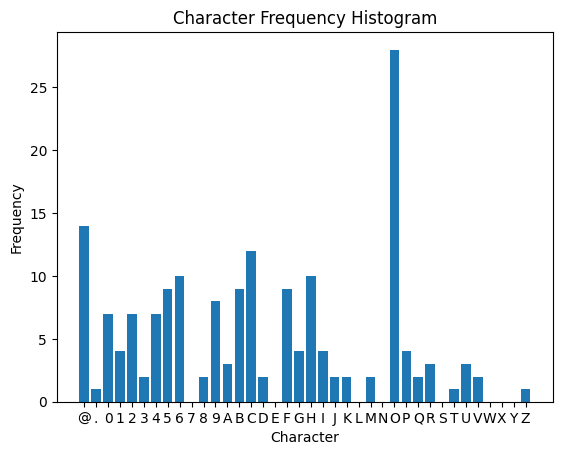

In [ ]:
def plot_histogram(ciphertext):
    char_freq = {}
    for char in ALPHABET:
        char_freq[char] = ciphertext.count(char)

    plt.bar(char_freq.keys(), char_freq.values())
    plt.title("Character Frequency Histogram")
    plt.xlabel("Character")
    plt.ylabel("Frequency")
    plt.show()

plot_histogram(encrypted_messages[0])


## 3.3. Using all ten encrypted messages as data sample, generate a box plot of the frequency of the five vowels of the alphabet

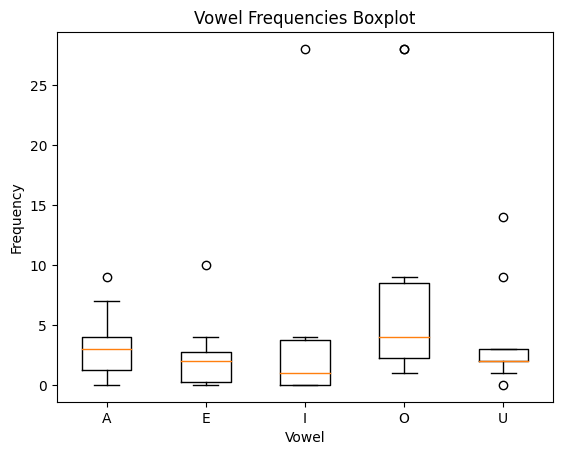

In [ ]:
def plot_vowel_boxplot(messages):
    vowels = 'AEIOU'
    vowel_freq = {v: [] for v in vowels}

    for msg in messages:
        for vowel in vowels:
            vowel_freq[vowel].append(msg.count(vowel))

    plt.boxplot(vowel_freq.values(), labels=vowel_freq.keys())
    plt.title("Vowel Frequencies Boxplot")
    plt.xlabel("Vowel")
    plt.ylabel("Frequency")
    plt.show()

plot_vowel_boxplot(encrypted_messages)


## 4. Would any other measurement of distance or similarity be useful for extracting information from the encrypted message? Why?

There are many metrics to measure distance or similarity. Depending on the nature of the encryption, different metrics could provide insights:

### Hamming Distance:
If the ciphertexts are of equal length and only vary by a few characters, Hamming distance could be useful.

### Jaccard Similarity:
Useful if you want to measure the similarity between sets of characters in two ciphertexts.

### Levenshtein (edit) Distance:
Measures the minimum number of edits (insertions, deletions, or substitutions) to change one string into another. Could be useful to understand how much two texts differ.

### Euclidean Distance:
If the ciphertexts are represented as vectors (like in our cosine similarity), the Euclidean distance can give an idea of how "far apart" two ciphertexts are in a vector space.

### Entropy:
If we measure the entropy of multiple encrypted messages, we could gain insights into the randomness or predictability of the encryption mechanism.



In the context of encrypted messages, understanding patterns or regularities can potentially help decrypt the message. Different distance or similarity measures may shed light on these patterns in different ways